#### Importando bibliotecas

In [1]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Pipeline de leitura das bases

In [2]:
base_path = Path(r"C:\Git\Projetos-Reposito-DA\Projeto1_Cohort_Empresas_BR\dados_projeto_1")

In [3]:
df_empresas = pd.read_parquet(base_path / "empresa_tratado.parquet")

print("📦 df_empresas")
print(f"Linhas: {len(df_empresas):,}")
print(f"Colunas ({len(df_empresas.columns)}):")
for col in df_empresas.columns:
    print(f" - {col}")

📦 df_empresas
Linhas: 65,696,874
Colunas (7):
 - cnpj_basico
 - razao_social
 - natureza_juridica
 - qualificacao_responsavel
 - capital_social
 - porte_empresa
 - ente_federativo


In [4]:
df_cnae = pd.read_parquet(base_path / "cnae_tratado.parquet")

print("📦 df_cnae")
print(f"Linhas: {len(df_cnae):,}")
print(f"Colunas ({len(df_cnae.columns)}): {list(df_cnae.columns)}")

📦 df_cnae
Linhas: 1,359
Colunas (2): ['codigo_cnae', 'descricao_cnae']


In [5]:
colunas = pq.read_schema(base_path / "estabelecimento_tratado.parquet").names

print("🎲 Colunas do arquivo estabelecimento_tratado.parquet:")
print(colunas)

🎲 Colunas do arquivo estabelecimento_tratado.parquet:
['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao', 'motivo_situacao', 'nome_cidade_exterior', 'pais', 'data_inicio_atividade', 'cnae_principal', 'cnae_secundarios', 'tipo_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd1', 'telefone1', 'ddd2', 'telefone2', 'ddd_fax', 'fax', 'email', 'situacao_especial', 'data_situacao_especial']


In [6]:
df_estabelecimento = pd.read_parquet(
    base_path / "estabelecimento_tratado.parquet",
    columns=[
        "cnpj_basico",
        "matriz_filial",
        "cnae_principal",
        "municipio",
        "uf",
        "situacao_cadastral",
        "motivo_situacao",
        "data_situacao",
        "data_inicio_atividade",
        "situacao_especial",
        "data_situacao_especial",
    ]
)

print("📦 df_estabelecimento (parcial)")
print(f"Linhas: {len(df_estabelecimento):,}")
print(f"Colunas: {list(df_estabelecimento.columns)}")

📦 df_estabelecimento (parcial)
Linhas: 68,879,494
Colunas: ['cnpj_basico', 'matriz_filial', 'cnae_principal', 'municipio', 'uf', 'situacao_cadastral', 'motivo_situacao', 'data_situacao', 'data_inicio_atividade', 'situacao_especial', 'data_situacao_especial']


In [7]:
df_natureza = pd.read_parquet(base_path / "natureza_tratado.parquet")

print("📦 df_natureza")
print(f"Linhas: {len(df_natureza):,}")
print(f"Colunas: {list(df_natureza.columns)}")

📦 df_natureza
Linhas: 91
Colunas: ['codigo_natureza', 'descricao_natureza']


In [8]:
df_socio = pd.read_parquet(
    base_path / "socio_tratado.parquet",
    columns=[
        "cnpj_basico",
        "qualificacao_socio",
        "tipo_socio"
    ]
)

print("📦 df_socio (parcial)")
print(f"Linhas: {len(df_socio):,}")
print(f"Colunas: {list(df_socio.columns)}")

📦 df_socio (parcial)
Linhas: 26,806,352
Colunas: ['cnpj_basico', 'qualificacao_socio', 'tipo_socio']


#### Exploração das tabelas

##### *Glossário*

###### CÓDIGO DA SITUAÇÃO CADASTRAL:
- 01 – NULA
- 2 – ATIVA
- 3 – SUSPENSA
- 4 – INAPTA
- 08 – BAIXADA
___________________________________________

###### CÓDIGO DO PORTE DA EMPRESA:
- 00 – NÃO INFORMADO
- 01 - MICRO EMPRESA
- 03 - EMPRESA DE PEQUENO PORTE
- 05 - DEMAIS

___________________________________________

###### CÓDIGO DO IDENTIFICADOR MATRIZ/FILIAL:
- 1 – MATRIZ
- 2 – FILIAL

In [40]:
#Filtrando os CNAEs para filtrar os CNPJs
## Busquei na internet os principais CNAEs relacionados à construção civil
CNAES_CONSTRUCAO = ["4744099", "4679699", "4744005", "4744001", "4744002", "4744003", "4744004", "4742300", "4741500"]
df_cnae_1 = df_cnae[df_cnae["codigo_cnae"].isin(CNAES_CONSTRUCAO)]
df_cnae_1.head(20)

,codigo_cnae,descricao_cnae
794,4679699,Comércio atacadista de materiais de construção em geral
838,4741500,Comércio varejista de tintas e materiais para pintura
839,4742300,Comércio varejista de material elétrico
841,4744001,Comércio varejista de ferragens e ferramentas
842,4744002,Comércio varejista de madeira e artefatos
843,4744003,Comércio varejista de materiais hidráulicos
844,4744004,"Comércio varejista de cal, areia, pedra britada, tijolos e telhas"
845,4744005,Comércio varejista de materiais de construção não especificados anteriormente
847,4744099,Comércio varejista de materiais de construção em geral


In [39]:
pd.set_option('display.max_colwidth', None)

In [10]:
# Filtrando o dataframe de estabelecimento para conter apenas os CNPJs com CNAEs relacionados à construção civil
df_estabelecimento_filter = df_estabelecimento[df_estabelecimento["cnae_principal"].isin(CNAES_CONSTRUCAO)]

# Resetando o índice e removendo duplicatas do cnpj
df_estabelecimento_filter = df_estabelecimento_filter.reset_index(drop=True)
df_estabelecimento_filter = df_estabelecimento_filter.drop_duplicates(subset=["cnpj_basico"])

df_estabelecimento_filter

,cnpj_basico,matriz_filial,cnae_principal,municipio,uf,situacao_cadastral,motivo_situacao,data_situacao,data_inicio_atividade,situacao_especial,data_situacao_especial
0,67345314,1,4744001,7159,SP,08,01,20200220,19911209,None,None
1,67346429,1,4744001,7099,SP,08,71,20081231,19911211,None,None
2,67373498,1,4744001,6847,SP,08,01,19940630,19911212,None,None
3,12326252,1,4744001,1083,PI,08,73,20150209,19871217,None,None
4,30437404,1,4744001,5879,RJ,04,63,20190115,19790317,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1157840,67283481,1,4741500,7107,SP,08,01,20031020,19911127,None,None
1157841,12228946,1,4744001,1389,CE,04,63,20181026,19870921,None,None
1157842,87237426,1,4744001,8963,RS,08,01,20040820,19880131,None,None
1157843,67307173,1,4744001,7107,SP,08,01,19920709,19911128,None,None


In [11]:
# Traduzindo os códigos de situação cadastral para texto descritivo - Situação Cadastral
# Criando o dicionário de mapeamento

situacao_map = {
    '01': 'NULA',
    '1':  'NULA', 
    '02': 'ATIVA',
    '2':  'ATIVA',    
    '03': 'SUSPENSA',
    '3':  'SUSPENSA', 
    '04': 'INAPTA',
    '4':  'INAPTA',    
    '08': 'BAIXADA',
    '8':  'BAIXADA'
}

# Aplicando o mapeamento no DataFrame
df_estabelecimento_filter['situacao_cadastral'] = (
    df_estabelecimento_filter['situacao_cadastral']
    .astype(str)
    .map(situacao_map)
)

# Verificando se sobrou algum código sem tradução (virou NaN)
print(df_estabelecimento_filter['situacao_cadastral'].unique())

['BAIXADA' 'INAPTA' 'SUSPENSA' 'ATIVA' 'NULA']


In [12]:

# Traduzindo os códigos de matriz/filial para texto descritivo - Matriz ou Filial
# Criando o dicionário de mapeamento

matriz_filial_map = {
    '01': 'MATRIZ',
    '1':  'MATRIZ', 
    '02': 'FILIAL',
    '2':  'FILIAL'
}

# Aplicando o mapeamento no DataFrame
df_estabelecimento_filter['matriz_filial'] = (
    df_estabelecimento_filter['matriz_filial']
    .astype(str)
    .map(matriz_filial_map)
)

# Verificando se sobrou algum código sem tradução (virou NaN)
print(df_estabelecimento_filter['matriz_filial'].unique())

['MATRIZ' 'FILIAL']


In [13]:
# Mostra a contagem de cada situação
contagem = df_estabelecimento_filter['situacao_cadastral'].value_counts()
print(contagem)

situacao_cadastral
BAIXADA     479095
ATIVA       410833
INAPTA      197161
SUSPENSA      5099
NULA          1826
Name: count, dtype: int64


In [14]:
#Filtrando apenas as matrizes
df_matriz = df_estabelecimento_filter[
    df_estabelecimento_filter['matriz_filial'] == 'MATRIZ'
]

df_matriz_ativa = df_estabelecimento_filter[
    df_estabelecimento_filter['situacao_cadastral'] == 'ATIVA'
].copy()

#Apenas Matrizes
contagem = df_matriz['situacao_cadastral'].value_counts()
print(contagem)

situacao_cadastral
BAIXADA     458857
ATIVA       399514
INAPTA      193407
SUSPENSA      4879
NULA          1812
Name: count, dtype: int64


In [15]:
df = df_estabelecimento_filter.copy()

# --- Passo 1: Criar coluna decada_inauguracao ---
# Convertendo para datetime caso ainda não seja
df['data_inicio_atividade'] = pd.to_datetime(df['data_inicio_atividade'], errors='coerce')

# A lógica matemática é: (Ano // 10) * 10. Ex: 1995 // 10 = 199 * 10 = 1990.
df['decada_inauguracao'] = (df['data_inicio_atividade'].dt.year // 10) * 10

# --- Passo 2: Calcular tempo_sobrevivencia ---
# Convertendo data_situacao para datetime
df['data_situacao'] = pd.to_datetime(df['data_situacao'], errors='coerce')

# Criando uma coluna temporária preenchendo Nulos com '2025-12-31'
data_situacao_final = df['data_situacao'].fillna(pd.Timestamp('2025-12-31'))

# Subtração: (Data Final - Data Inicio) em dias, dividido por 365.25 para ter anos
df['tempo_sobrevivencia'] = (data_situacao_final - df['data_inicio_atividade']).dt.days / 365.25

# --- Passo 3: Tabela Agrupada por Década E Matriz/Filial ---
# Agora agrupamos por DUAS colunas
tabela_resumo = df.groupby(['decada_inauguracao', 'matriz_filial']).agg(
    qtd_cnpjs=('cnpj_basico', 'count'),
    media_tempo_sobrevivencia=('tempo_sobrevivencia', 'mean')
).reset_index()

In [16]:
print("Tabela Resumo:")
print(tabela_resumo)

Tabela Resumo:
    decada_inauguracao matriz_filial  qtd_cnpjs  media_tempo_sobrevivencia
0                 1940        MATRIZ          8                  68.275154
1                 1950        MATRIZ         31                  54.261730
2                 1960        FILIAL        138                  36.852940
3                 1960        MATRIZ       3735                  41.274803
4                 1970        FILIAL        877                  28.591694
5                 1970        MATRIZ      10906                  32.617155
6                 1980        FILIAL       3890                  17.893477
7                 1980        MATRIZ      72843                  21.024196
8                 1990        FILIAL       7415                  13.188665
9                 1990        MATRIZ     191718                  15.716692
10                2000        FILIAL       6669                   8.205078
11                2000        MATRIZ     188424                  10.432520
12        

In [17]:
# --- Preparação para os Gráficos ---
# Para facilitar o plot agrupado, usamos o pivot
pivot_qtd = tabela_resumo.pivot(index='decada_inauguracao', columns='matriz_filial', values='qtd_cnpjs').fillna(0)
pivot_media = tabela_resumo.pivot(index='decada_inauguracao', columns='matriz_filial', values='media_tempo_sobrevivencia').fillna(0)

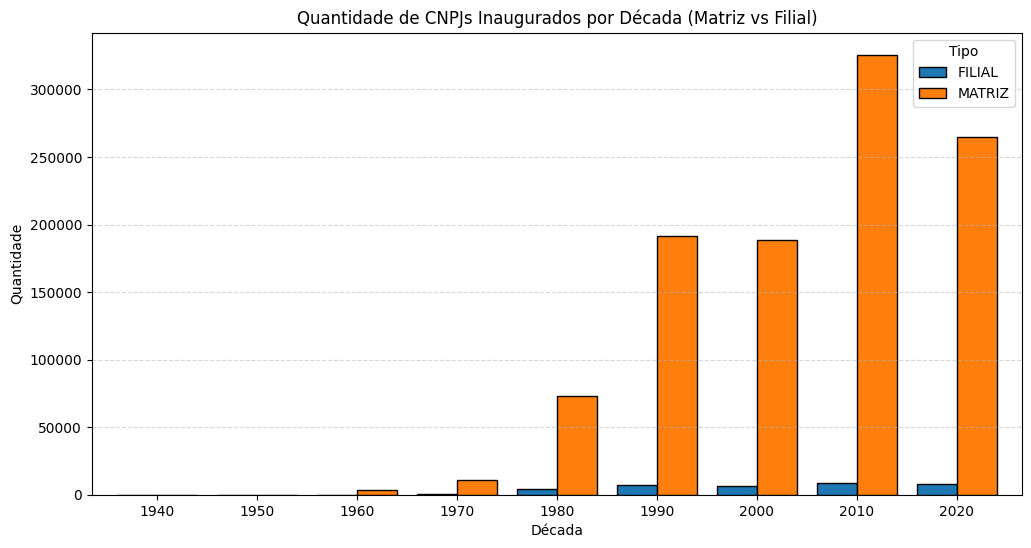

In [18]:
# O pandas facilita muito plotar pivot tables diretamente
ax1 = pivot_qtd.plot(kind='bar', figsize=(12, 6), width=0.8, edgecolor='black', rot=0)
plt.title('Quantidade de CNPJs Inaugurados por Década (Matriz vs Filial)')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')
plt.show()

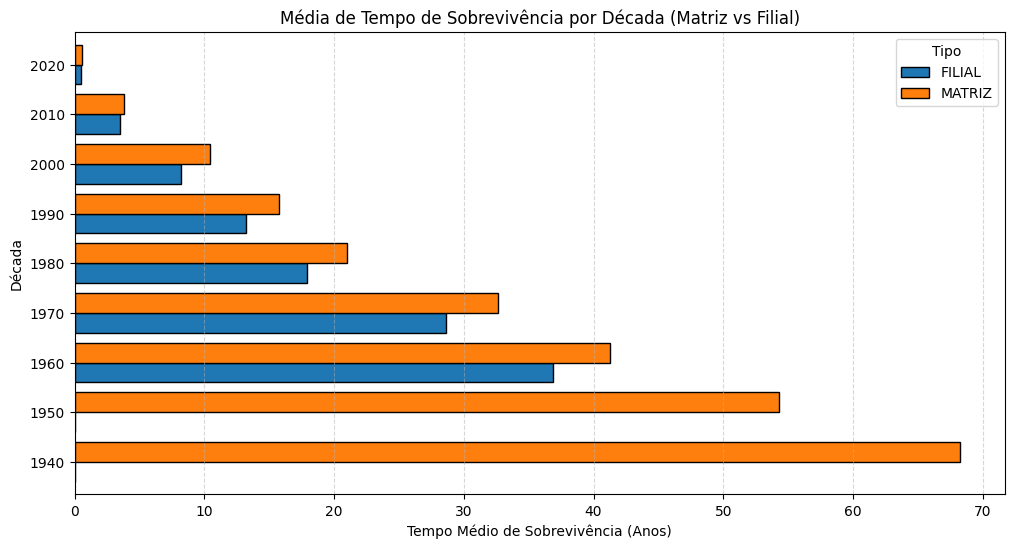

In [19]:
# --- Passo 5: Gráfico Média Sobrevivência (Barras Horizontais Agrupadas) ---
ax2 = pivot_media.plot(kind='barh', figsize=(12, 6), width=0.8, edgecolor='black')
plt.title('Média de Tempo de Sobrevivência por Década (Matriz vs Filial)')
plt.xlabel('Tempo Médio de Sobrevivência (Anos)')
plt.ylabel('Década')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')
plt.show()

In [20]:
df.columns

Index(['cnpj_basico', 'matriz_filial', 'cnae_principal', 'municipio', 'uf',
       'situacao_cadastral', 'motivo_situacao', 'data_situacao',
       'data_inicio_atividade', 'situacao_especial', 'data_situacao_especial',
       'decada_inauguracao', 'tempo_sobrevivencia'],
      dtype='object')

In [21]:
from datetime import datetime

# 1. Configuração da Janela de Análise (Ex: 5 anos)
ANOS_CORTE = 20
hoje = pd.to_datetime("today")

# Converter data se não estiver em datetime
df['data_inicio_atividade'] = pd.to_datetime(df['data_inicio_atividade'])

# 2. FILTRO CRUCIAL (O "Pulo do Gato")
# Só podemos julgar se uma empresa sobreviveu 5 anos se ela abriu há mais de 5 anos.
# Se incluirmos empresas de 2022, 2023, elas nunca terão tempo_sobrevivencia >= 5 ainda.
data_limite_analise = hoje - pd.DateOffset(years=ANOS_CORTE)

df_analise = df[df['data_inicio_atividade'] <= data_limite_analise].copy()

# 3. Criar a Flag Binária (1 = Sucesso, 0 = Falha)
# A empresa sobreviveu se o tempo total dela for maior que o corte
df_analise['superou_20_anos'] = df_analise['tempo_sobrevivencia'] >= ANOS_CORTE
# Converter para int para facilitar a média (0 ou 1)
df_analise['superou_20_anos'] = df_analise['superou_20_anos'].astype(int)

# 4. Agrupar os dados
# A média de uma coluna de 0s e 1s é exatamente a porcentagem de sucesso
resumo_taxa = df_analise.groupby(['decada_inauguracao', 'matriz_filial'])['superou_20_anos'].mean().reset_index()
# Multiplicar por 100 para ficar em % no gráfico
resumo_taxa['superou_20_anos'] = resumo_taxa['superou_20_anos'] * 100

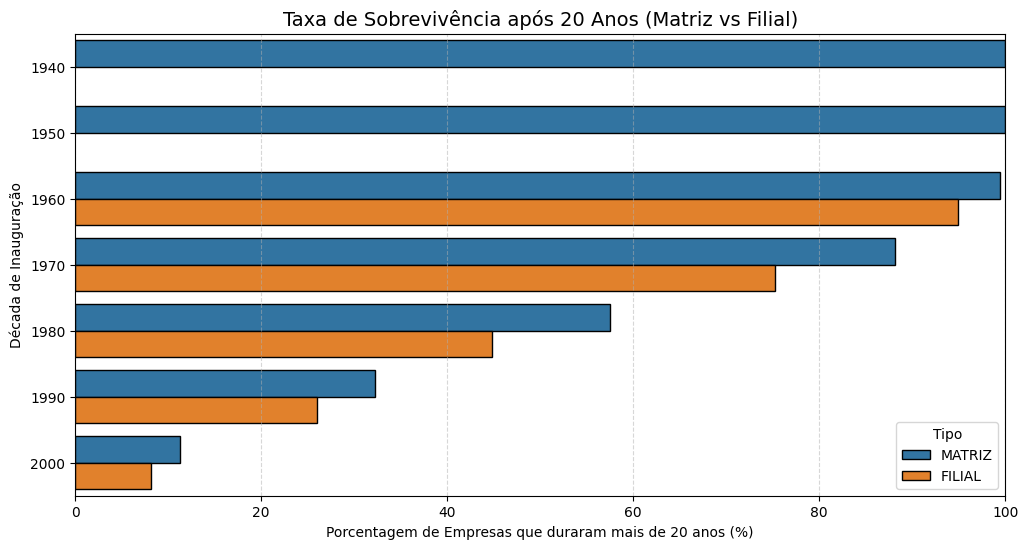

In [22]:
# 5. Gerar o Gráfico
plt.figure(figsize=(12, 6))

sns.barplot(
    data=resumo_taxa,
    y='decada_inauguracao',
    x='superou_20_anos',
    hue='matriz_filial',
    orient='h',
    edgecolor='black'
)

plt.title(f'Taxa de Sobrevivência após {ANOS_CORTE} Anos (Matriz vs Filial)', fontsize=14)
plt.xlabel('Porcentagem de Empresas que duraram mais de 20 anos (%)')
plt.ylabel('Década de Inauguração')
plt.xlim(0, 100) # Fixar eixo X de 0 a 100%
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')

plt.show()

In [23]:
# --- CONFIGURAÇÃO ---
# Converter datas
df['data_inicio_atividade'] = pd.to_datetime(df['data_inicio_atividade'])

# 1. FILTRAR O PERÍODO DE INTERESSE (2020 a 2024)
# Queremos ver a evolução ano a ano, então criamos uma coluna de Ano
df['ano_inauguracao'] = df['data_inicio_atividade'].dt.year

# Filtro: Apenas empresas abertas entre 2020 e 2024
# (Assumindo que dados de 2025/2026 já existem ou que 2024 já maturou 1 ano)
df_recente = df[(df['ano_inauguracao'] >= 2020) & (df['ano_inauguracao'] <= 2024)].copy()

# 2. CRIAR INDICADOR DE MORTALIDADE NO 1º ANO
# Lógica: Se o tempo de sobrevivência é menor que 1 ano, ela fechou precocemente.
# (Obs: Como estamos analisando passado (2020-2024), empresas ativas teriam >1 ano de vida hoje.
# Logo, quem tem <1 ano nesse grupo são, de fato, as que fecharam.)
df_recente['mortalidade_precoce'] = df_recente['tempo_sobrevivencia'] < 1
df_recente['mortalidade_precoce'] = df_recente['mortalidade_precoce'].astype(int) * 100

# 3. AGRUPAR POR ANO (E NÃO DÉCADA) PARA VER A TENDÊNCIA
# Calculamos a média (que vira %) de mortalidade
resumo_mortalidade = df_recente.groupby(['ano_inauguracao', 'matriz_filial'])['mortalidade_precoce'].mean().reset_index()

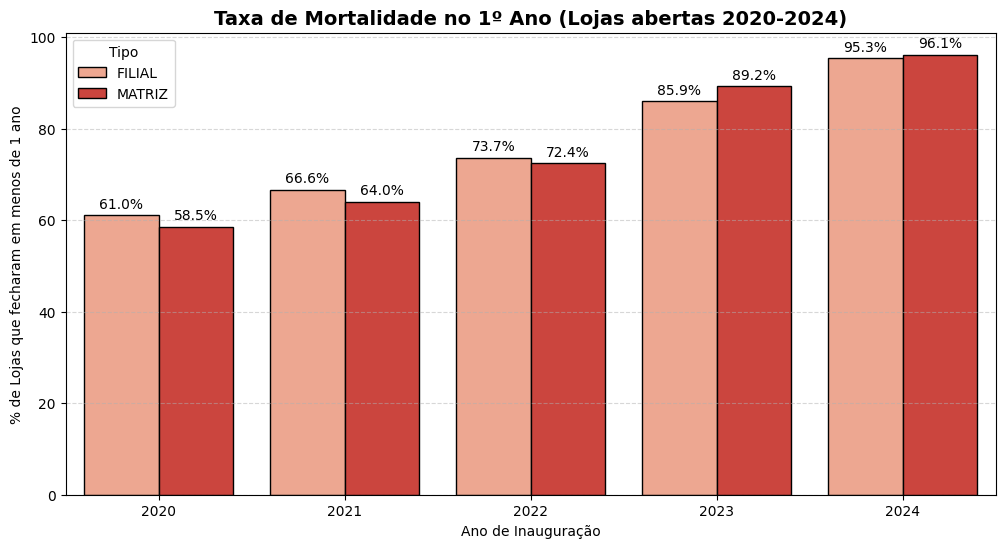

In [24]:
# --- GRÁFICO ---
plt.figure(figsize=(12, 6))

# Usando barplot para comparar Matriz x Filial lado a lado em cada ano
ax = sns.barplot(
    data=resumo_mortalidade,
    x='ano_inauguracao',
    y='mortalidade_precoce',
    hue='matriz_filial',
    edgecolor='black',
    palette='Reds' # Paleta vermelha para indicar "perigo/mortalidade"
)

# Estilização
plt.title('Taxa de Mortalidade no 1º Ano (Lojas abertas 2020-2024)', fontsize=14, fontweight='bold')
plt.ylabel('% de Lojas que fecharam em menos de 1 ano')
plt.xlabel('Ano de Inauguração')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')

# Adicionar rótulos de dados nas barras para facilitar a leitura
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.show()

In [25]:
# --- BLOCO 1: SALDO LÍQUIDO (ABERTURAS vs FECHAMENTOS) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir formato de data
df['data_inicio_atividade'] = pd.to_datetime(df['data_inicio_atividade'])
df['data_situacao'] = pd.to_datetime(df['data_situacao'])

# 1. Contagem de Aberturas por Ano
aberturas = df.groupby(df['data_inicio_atividade'].dt.year).size().rename('Aberturas')

# 2. Contagem de Fechamentos por Ano
# IMPORTANTE: Ajuste o filtro 'situacao_cadastral' conforme seus dados (ex: 'BAIXADA', 'INAPTA' ou códigos 8, 4)
# Assumindo que você tem uma coluna identificando empresas fechadas.
# Se não tiver filtro explicito, assuma que quem tem data_situacao e NÃO é ativa, fechou.
fechamentos = df[df['situacao_cadastral'] != 'ATIVA'].groupby(df['data_situacao'].dt.year).size().rename('Fechamentos')

# 3. Unir os dados
saldo_anual = pd.concat([aberturas, fechamentos], axis=1).fillna(0)
saldo_anual['Saldo'] = saldo_anual['Aberturas'] - saldo_anual['Fechamentos']

# Filtrar período relevante para evitar distorções de dados muito antigos ou incompletos
saldo_anual = saldo_anual.loc[2010:2024] 


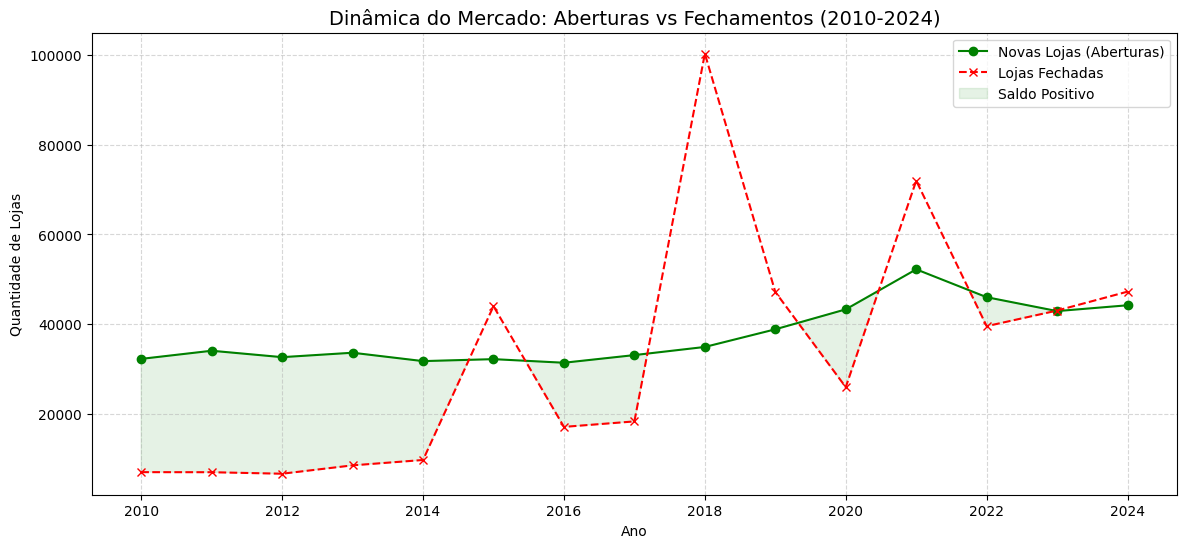

In [26]:

# 4. Plotar
plt.figure(figsize=(14, 6))
plt.plot(saldo_anual.index, saldo_anual['Aberturas'], label='Novas Lojas (Aberturas)', color='green', marker='o')
plt.plot(saldo_anual.index, saldo_anual['Fechamentos'], label='Lojas Fechadas', color='red', marker='x', linestyle='--')

# Opcional: Pintar a área entre as linhas
plt.fill_between(saldo_anual.index, saldo_anual['Aberturas'], saldo_anual['Fechamentos'], 
                 where=(saldo_anual['Aberturas'] > saldo_anual['Fechamentos']), 
                 interpolate=True, color='green', alpha=0.1, label='Saldo Positivo')

plt.title('Dinâmica do Mercado: Aberturas vs Fechamentos (2010-2024)', fontsize=14)
plt.ylabel('Quantidade de Lojas')
plt.xlabel('Ano')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [27]:
# --- BLOCO 2: TAXA DE SOBREVIVÊNCIA POR ESTADO (UF) ---

# 1. Configurar Janela de 5 anos (Mesma lógica anterior, mas agrupando por UF)
ANOS_CORTE_UF = 5
hoje = pd.to_datetime("today")
data_limite_analise = hoje - pd.DateOffset(years=ANOS_CORTE_UF)

# Filtra apenas empresas que JÁ PODERIAM ter 5 anos (para não enviesar)
df_geo = df[df['data_inicio_atividade'] <= data_limite_analise].copy()

# Cria flag: 1 se sobreviveu > 5 anos, 0 se não
df_geo['sucesso_5anos'] = (df_geo['tempo_sobrevivencia'] >= ANOS_CORTE_UF).astype(int)

# 2. Agrupar por UF e calcular média (taxa de sucesso)
rank_uf = df_geo.groupby('uf')['sucesso_5anos'].mean().reset_index()
rank_uf['sucesso_5anos'] = rank_uf['sucesso_5anos'] * 100 # Em porcentagem
rank_uf = rank_uf.sort_values('sucesso_5anos', ascending=False) # Ordenar do melhor para o pior



C:\Users\rique\AppData\Local\Temp\ipykernel_12208\4188301505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rank_uf, x='uf', y='sucesso_5anos', palette='viridis', edgecolor='black')


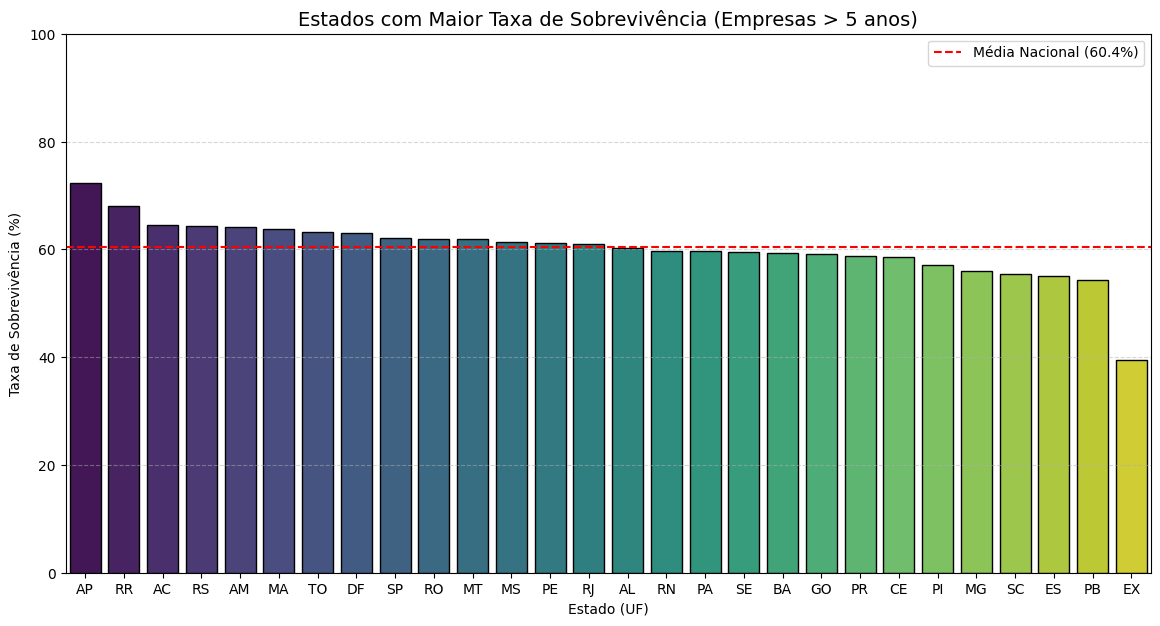

In [28]:
# 3. Plotar
plt.figure(figsize=(14, 7))
sns.barplot(data=rank_uf, x='uf', y='sucesso_5anos', palette='viridis', edgecolor='black')

# Linha média nacional para comparação
media_nacional = df_geo['sucesso_5anos'].mean() * 100
plt.axhline(y=media_nacional, color='red', linestyle='--', label=f'Média Nacional ({media_nacional:.1f}%)')

plt.title(f'Estados com Maior Taxa de Sobrevivência (Empresas > {ANOS_CORTE_UF} anos)', fontsize=14)
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xlabel('Estado (UF)')
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

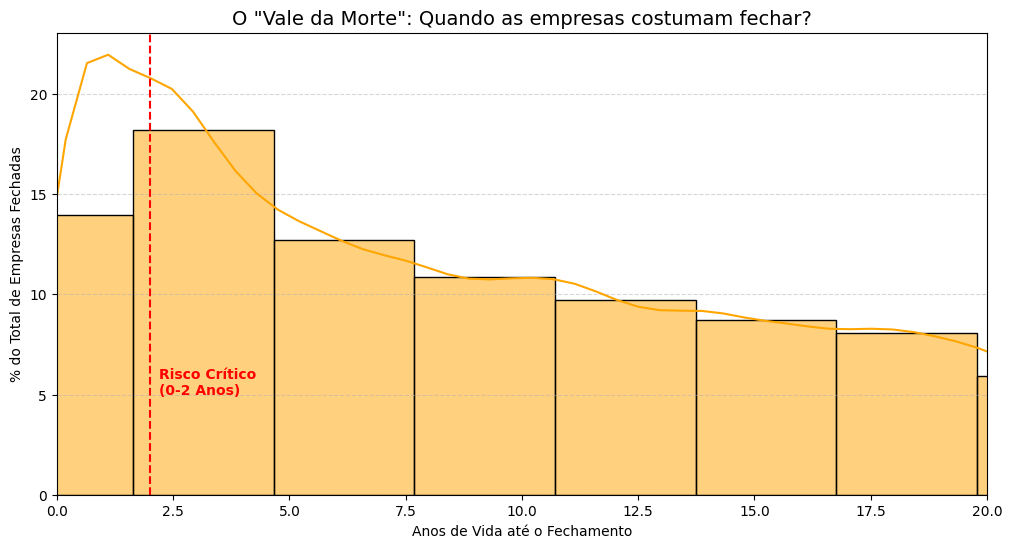

In [29]:
# --- BLOCO 3: CURVA DE RETENÇÃO (Mortalidade por Ano de Vida) ---

# Vamos olhar apenas para empresas que JÁ ENCERRARAM (Baixadas) para ver quando elas morrem.
# Ou melhor: Fazer um histograma da idade de mortalidade.
df_baixadas = df[df['situacao_cadastral'] != 'ATIVA'].copy()

plt.figure(figsize=(12, 6))

# Histograma e KDE (Linha de densidade)
sns.histplot(data=df_baixadas, x='tempo_sobrevivencia', bins=30, stat="percent", 
             kde=True, color='orange', edgecolor='black')

plt.title('O "Vale da Morte": Quando as empresas costumam fechar?', fontsize=14)
plt.xlabel('Anos de Vida até o Fechamento')
plt.ylabel('% do Total de Empresas Fechadas')
plt.xlim(0, 20) # Focando nos primeiros 20 anos para ver o detalhe do início
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Anotação de Storytelling
plt.axvline(x=2, color='red', linestyle='--')
plt.text(2.2, 5, 'Risco Crítico\n(0-2 Anos)', color='red', fontweight='bold')

plt.show()

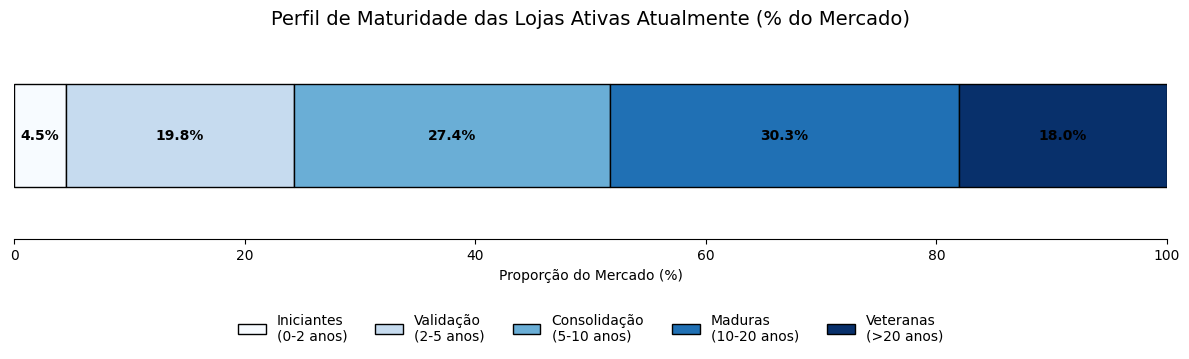

In [31]:
# 1. Preparar os dados (Mesma lógica de categorização)
df_ativas = df[df['situacao_cadastral'] == 'ATIVA'].copy()

bins = [0, 2, 5, 10, 20, 100]
labels = ['Iniciantes\n(0-2 anos)', 'Validação\n(2-5 anos)', 'Consolidação\n(5-10 anos)', 'Maduras\n(10-20 anos)', 'Veteranas\n(>20 anos)']
df_ativas['faixa_vida'] = pd.cut(df_ativas['tempo_sobrevivencia'], bins=bins, labels=labels)

# 2. Calcular a proporção (em %)
# normalize=True já nos dá a porcentagem (0.2, 0.5, etc)
perfil_maturidade = df_ativas['faixa_vida'].value_counts(normalize=True).sort_index() * 100

# Transformar em DataFrame com 1 linha para poder empilhar horizontalmente
df_plot = pd.DataFrame(perfil_maturidade).T 

# 3. Plotar
fig, ax = plt.subplots(figsize=(12, 4)) # Altura menor pois é apenas uma barra grossa

df_plot.plot(
    kind='barh', 
    stacked=True, 
    ax=ax, 
    colormap='Blues', # Mantendo a paleta que você gostou
    edgecolor='black',
    width=0.5
)

# 4. Estilização
plt.title('Perfil de Maturidade das Lojas Ativas Atualmente (% do Mercado)', fontsize=14)
plt.xlabel('Proporção do Mercado (%)')
plt.xlim(0, 100)
plt.yticks([]) # Remove o eixo Y pois só temos uma categoria (o Mercado Total)

# Remover as bordas do gráfico para ficar mais limpo
sns.despine(left=True, bottom=False)

# 5. Adicionar os Rótulos de Dados (% dentro das barras)
# Percorremos os "patches" (pedaços da barra) para escrever o texto no centro
for c in ax.containers:
    # Apenas adiciona o texto se a barra for larga o suficiente para caber (ex: > 2%)
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 2 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontweight='bold', color='black')

# Mover a legenda para baixo para não atrapalhar a barra
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=5, frameon=False)

plt.tight_layout()
plt.show()

C:\Users\rique\AppData\Local\Temp\ipykernel_12208\1773681847.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


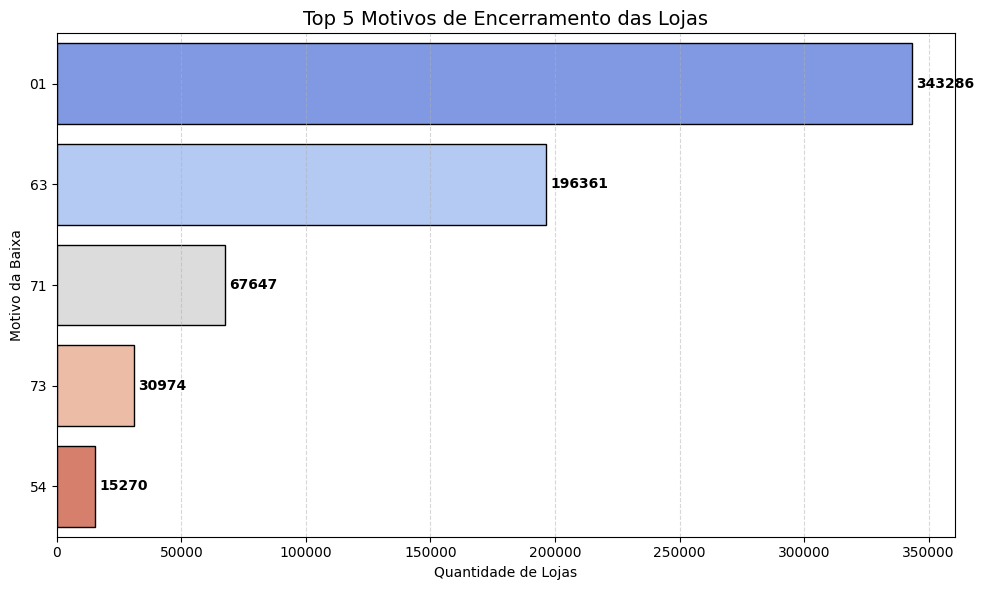

In [48]:
# --- BLOCO 5 ATUALIZADO: TOP MOTIVOS DE FECHAMENTO (COM QUEBRA DE LINHA) ---

# 1. Dicionário de Códigos da Receita Federal (Com \n para quebra de linha)
motivos_dict = {
    1: 'Extinção p/ Encerramento\nLiquidação Voluntária',
    63: 'Omissão de\nDeclarações',
    71: 'Inaptidão\n(Lei 11.941/2009 Art.54)',
    73: 'Omissão\nContumaz',
    54: 'Extinção - Tratamento\nDiferenciado ME/EPP',
    72: 'Inaptidão\n(Lei 11.941/2009 Art.54)', 
    74: 'Inexistência\nde Fato',
    6: 'Incorporação',
    9: 'Fusão'
}

# 2. Filtrar apenas as BAIXADAS/INAPTAS
df_mortas = df[df['situacao_cadastral'].isin(['BAIXADA', 'INAPTA'])].copy()

# 3. Mapear os códigos para texto
# Se o código não estiver no dicionário, ele mantém o número original
df_mortas['motivo_situacao_desc'] = df_mortas['motivo_situacao'].map(motivos_dict).fillna(df_mortas['motivo_situacao'])

# 4. Contar os motivos (usando a descrição agora)
top_motivos = df_mortas['motivo_situacao_desc'].value_counts().head(5).reset_index()
top_motivos.columns = ['Motivo', 'Quantidade']

# 5. Gráfico de Barras Horizontais
plt.figure(figsize=(10, 6))

# Ajustando a paleta e bordas
ax = sns.barplot(
    data=top_motivos, 
    y='Motivo', 
    x='Quantidade', 
    palette='coolwarm',
    edgecolor='black'
)

plt.title('Top 5 Motivos de Encerramento das Lojas', fontsize=14)
plt.xlabel('Quantidade de Lojas')
plt.ylabel('Motivo da Baixa') # Adicionei label no Y para clareza
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionar rótulos nas barras
for i in ax.containers:
    ax.bar_label(i, padding=3, fmt='%.0f', fontweight='bold')

plt.tight_layout() # Garante que os textos longos não sejam cortados na imagem final
plt.show()

C:\Users\rique\AppData\Local\Temp\ipykernel_12208\2576290237.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


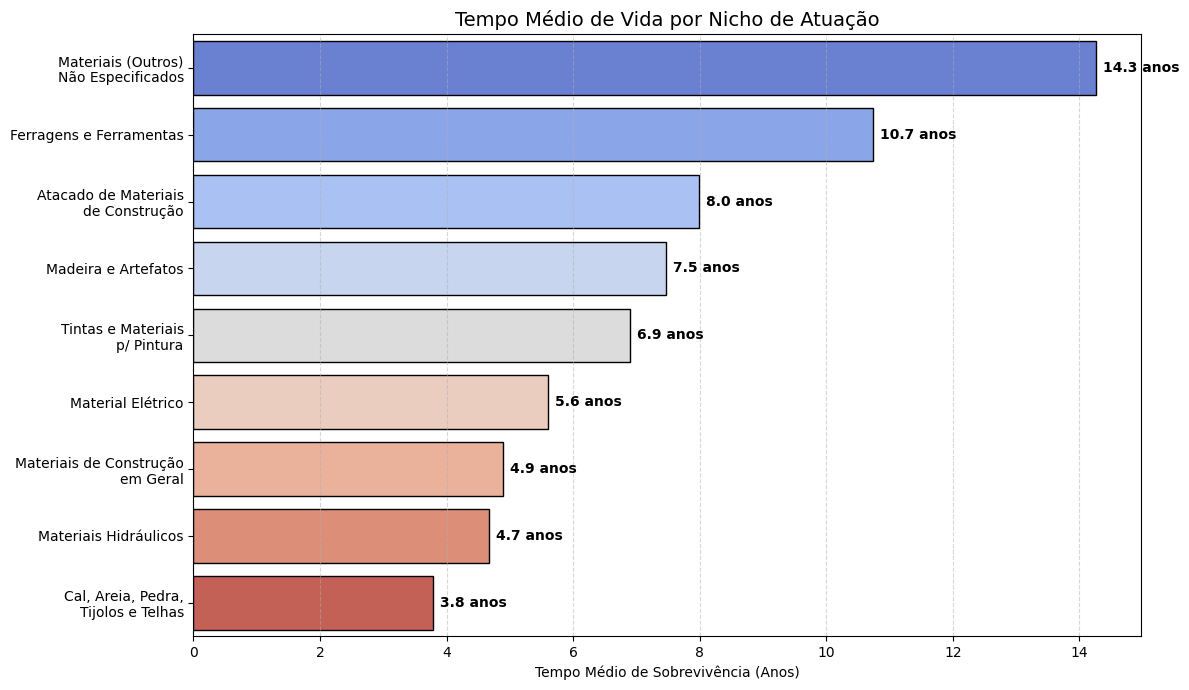

In [47]:
# --- BLOCO 6 CORRIGIDO (BLINDADO CONTRA ERROS DE TIPO) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dicionário de Legendas
cnae_dict = {
    4679699: 'Atacado de Materiais\nde Construção',
    4741500: 'Tintas e Materiais\np/ Pintura',
    4742300: 'Material Elétrico',
    4744001: 'Ferragens e Ferramentas',
    4744002: 'Madeira e Artefatos',
    4744003: 'Materiais Hidráulicos',
    4744004: 'Cal, Areia, Pedra,\nTijolos e Telhas',
    4744005: 'Materiais (Outros)\nNão Especificados',
    4744099: 'Materiais de Construção\nem Geral'
}

# 2. TRATAMENTO DE DADOS (O FIX DO PROBLEMA)
# Criamos uma cópia para não alterar o original
df_niche = df.copy()

# Forçamos a coluna a ser número (se tiver erro, vira NaN)
df_niche['cnae_principal'] = pd.to_numeric(df_niche['cnae_principal'], errors='coerce')

# 3. Filtrar e Mapear
# Agora garantimos que ambos são números
df_niche = df_niche[df_niche['cnae_principal'].isin(cnae_dict.keys())]

# Se o df_niche ficar vazio aqui, avisa no print
if df_niche.empty:
    print("ALERTA: O filtro retornou vazio. Verifique se os códigos CNAE no seu Excel são iguais aos da lista.")
else:
    # Mapear
    df_niche['cnae_desc'] = df_niche['cnae_principal'].map(cnae_dict)

    # 4. Calcular Média e Ordenar
    niche_survival = df_niche.groupby('cnae_desc')['tempo_sobrevivencia'].mean().reset_index()
    niche_survival = niche_survival.sort_values('tempo_sobrevivencia', ascending=False)

    # 5. Gráfico
    plt.figure(figsize=(12, 7))

    ax = sns.barplot(
        data=niche_survival, 
        y='cnae_desc', 
        x='tempo_sobrevivencia', 
        palette='coolwarm',
        edgecolor='black'
    )

    plt.title('Tempo Médio de Vida por Nicho de Atuação', fontsize=14)
    plt.xlabel('Tempo Médio de Sobrevivência (Anos)')
    plt.ylabel('') # Remove label do Y pois os textos já explicam
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Adicionar os valores nas pontas
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f anos', padding=5, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [ ]:
codigo_cnae	descricao_cnae
4679699	Comércio atacadista de materiais de construção em geral
4741500	Comércio varejista de tintas e materiais para pintura
4742300	Comércio varejista de material elétrico
4744001	Comércio varejista de ferragens e ferramentas
4744002	Comércio varejista de madeira e artefatos
4744003	Comércio varejista de materiais hidráulicos
4744004	Comércio varejista de cal, areia, pedra britada, tijolos e telhas
4744005	Comércio varejista de materiais de construção não especificados anteriormente
4744099	Comércio varejista de materiais de construção em geral